In [1]:
import pandas as pd
from util import NAME, VALUE, TYPE, DATE, sensors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import pandas.plotting._converter as pandacnv
pandacnv.register()

In [3]:
data = pd.read_csv('./data/20180920_Kaufland_case_IoT_and_predictive_maintenance.csv', sep=';')
data.shape

(3860434, 7)

In [4]:
data.head()

,ifm_analysis_sensordata_for_datathon_final.machine_name,ifm_analysis_sensordata_for_datathon_final.sensor_type,ifm_analysis_sensordata_for_datathon_final.date_measurement,ifm_analysis_sensordata_for_datathon_final.start_timestamp,ifm_analysis_sensordata_for_datathon_final.end_timestamp,ifm_analysis_sensordata_for_datathon_final.realvalue,ifm_analysis_sensordata_for_datathon_final.unit
0,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:42.823,2016-09-02 15:26:42.823,0.395,mm/s
1,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:45.653,2016-09-02 15:26:45.653,0.577,mm/s
2,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:48.467,2016-09-02 15:26:48.467,0.717,mm/s
3,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:51.293,2016-09-02 15:26:51.293,0.832,mm/s
4,RBG1,drive_gear_V_eff,2016-09-02,2016-09-02 15:26:54.107,2016-09-02 15:26:54.107,0.941,mm/s


In [5]:
data.isnull().values.any()

False

In [6]:
data[NAME].value_counts()

RBG7    1264573
RBG1     928255
RBG2     346060
RBG3     340404
RBG4     332969
RBG6     330710
RBG5     317463
Name: ifm_analysis_sensordata_for_datathon_final.machine_name, dtype: int64

In [7]:
data[TYPE].value_counts().index

Index(['lifting_motor_a_max', 'lifting_gear_a_max', 'idle_wheel_a_max',
       'drive_wheel_a_max', 'drive_motor_a_max', 'drive_gear_a_max',
       'drive_wheel_V_eff', 'lifting_motor_V_eff', 'idle_wheel_V_eff',
       'lifting_gear_V_eff', 'drive_motor_V_eff', 'drive_gear_V_eff'],
      dtype='object')

In [8]:
def extract_sensor(machine=None, sensor=None):
    sensor = data[data[TYPE] == sensor]
    sensor = sensor[sensor[NAME] == machine]
    return sensor.copy()

In [9]:
def get_mean_by_date(data=None):
    mean_dict = {}
    for date in data[DATE].value_counts().index.values:
        mean_dict[date] = data [ data[DATE] == date][VALUE].mean()
        
    return mean_dict

In [10]:
def plot_time(col=DATE,data=None, mean=False):
    if mean:
        mean_dict = get_mean_by_date(data=data)
        plt.figure(figsize=(20,20))
        plt.plot_date([pd.Timestamp(k) for k,v in mean_dict.items()], [v for k,v in mean_dict.items()])
        plt.show()
        return
    data = data.copy()
    data[col] = data[col].map(lambda x: pd.Timestamp(x).to_pydatetime())
    plt.figure(figsize=(20,20))
    plt.plot_date(data[col], data[VALUE])
    plt.show()

In [11]:
drive_gear_2 = extract_sensor(machine='RBG2', sensor='drive_gear_V_eff')
drive_gear_2.shape

(21661, 7)

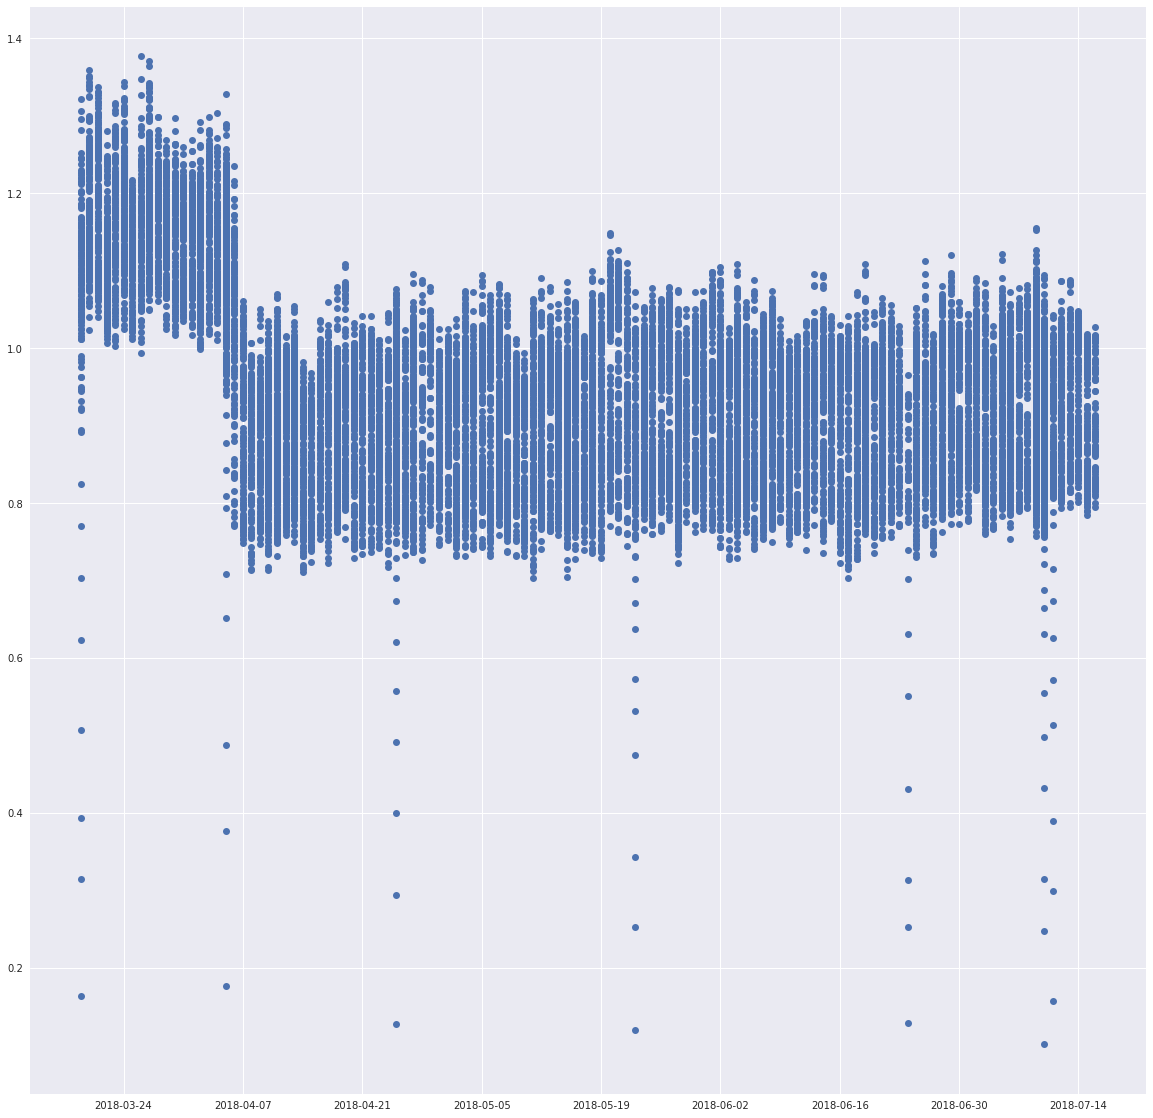

In [12]:
plot_time(data=drive_gear_2)

In [13]:
drive_gear_3 = extract_sensor(machine='RBG3', sensor='drive_gear_V_eff')
drive_gear_3.shape

(21084, 7)

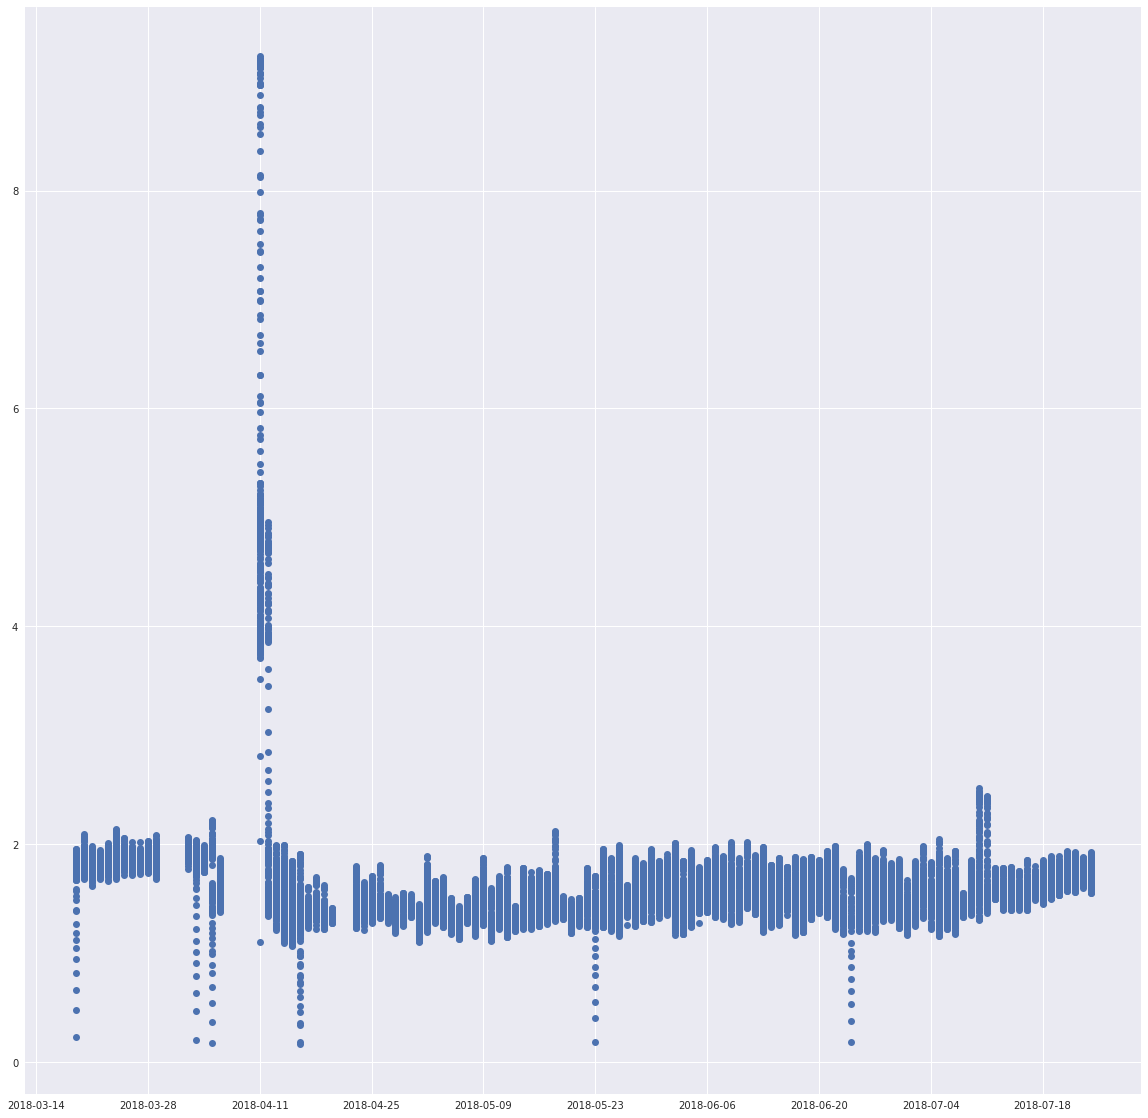

In [14]:
plot_time(data=drive_gear_3)

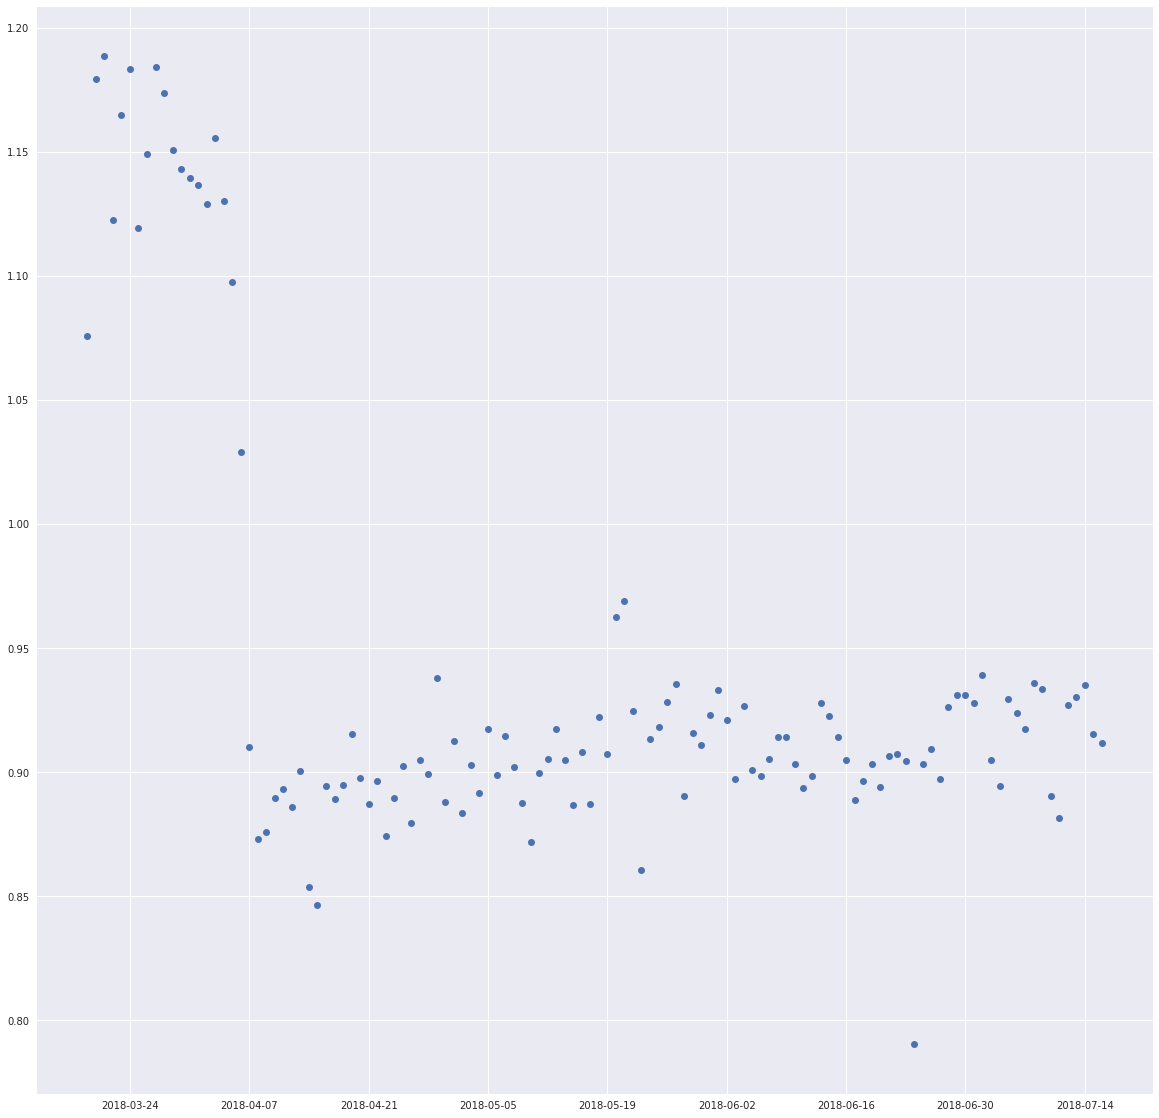

In [15]:
plot_time(data=drive_gear_2, mean=True)

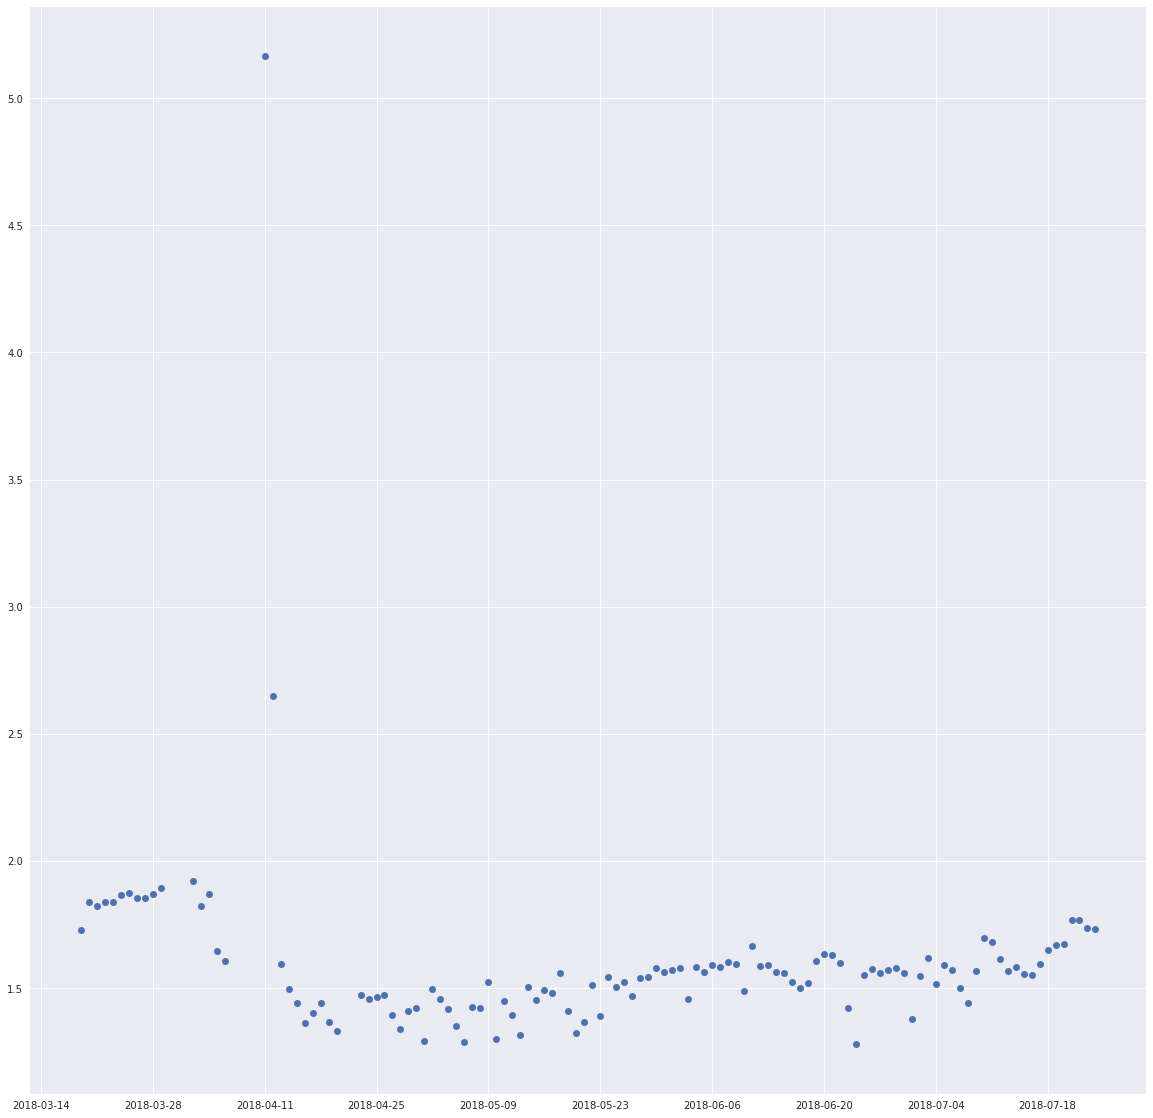

In [16]:
plot_time(data=drive_gear_3, mean=True)

In [17]:
features = {}
machines = ['RBG' + str(i) for i in range(1,8)]
for machine in machines:
    features[machine] = {}
    for sensor in sensors:
        sdf = extract_sensor(machine=machine, sensor=sensor)
        mean_by_date = get_mean_by_date(data=sdf)
        for date, v in mean_by_date.items():
            if date in features[machine]:
                features[machine][date].append(v)
            else:
                features[machine][date] = [v]

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [19]:
def get_features(machine):
    m = features[machine]
    m = [v for k,v in m.items()]
    return m

In [20]:
color_map = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'yellow',
    5: 'pink',
    6: 'brown',
    7: 'black'
}

In [21]:
rbgs_f = []
rbgs_col = []
for i,m in enumerate([get_features(machine) for machine in machines]):
    rbgs_f +=m
    
    rbgs_col+= [i for _ in range(len(m))]

print(len(rbgs_f))
print(len(rbgs_col))

1435
1435


In [22]:
rbgs_fn = np.zeros((len(rbgs_f), len(rbgs_f[0])))
rbgs_fn.shape

(1435, 12)

In [23]:
for i,f in enumerate(rbgs_f):
    if len(f) != 12:
        print(f)
    else:
        rbgs_fn[i,] = f
rbgs_fn.shape

[4130.839704545456, 1026.6602045454545, 1.31396875, 0.8005862068965517]


(1435, 12)

In [24]:
# kmeans = KMeans(n_clusters=2, random_state=0).fit(rbg2 + rbg3)
# clust = kmeans.predict(rbg2 + rbg3)

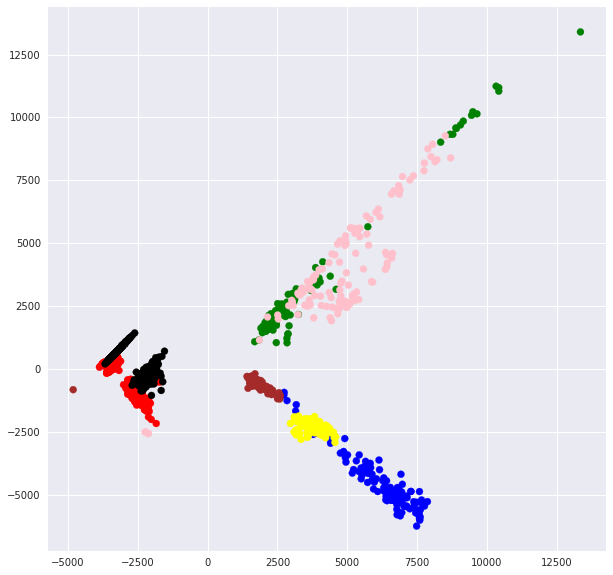

In [25]:
reduced_rbg2 = PCA(n_components=2).fit_transform(rbgs_fn)
# reduced_rbg2 = TSNE(n_components=2, random_state=12345).fit_transform(rbgs_fn)
plt.figure(figsize=(10,10,))
# colors = ['red' for _ in range(rbg2_len)] + ['green' for _ in range(rbg3_len)]
# print(len(colors))
# colors = ['red' if l else 'green' for l in clust]
colors = list(map(lambda c: color_map[c+1], rbgs_col))
plt.scatter(reduced_rbg2[:, 0], reduced_rbg2[:, 1],color=colors)
plt.show()